In [1]:
%env KERAS_BACKEND = tensorflow

env: KERAS_BACKEND=tensorflow


In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ipywidgets import interact , IntSlider , Button

#### 匯入一些神經網路會用到的東西

In [5]:
#Keras Functions
from keras.models import Sequential
from keras.layers import Dense , Activation
from keras.optimizers import SGD

#Keras Datasets
from keras.datasets import mnist

#Keras Utils
from keras.utils import np_utils

### 由 Keras 讀入 MNIST

In [12]:
(x_train0,y_train0) , (x_test0,y_test0) = mnist.load_data()

In [17]:
print("共 %d 筆訓練資料 , 每筆有 %d x %d "%x_train0.shape)
print("輸出訓練資料有 %d 筆  "%y_train0.shape)

共 60000 筆訓練資料 , 每筆有 28 x 28 
輸出訓練資料有 60000 筆  


### 將0~9分成是五的倍數與不是五的倍數

In [54]:
x_train = x_train0.reshape(60000, 784)
x_test = x_test0.reshape(10000, 784)
x_train -= x_train.min()
x_train = x_train/x_train.max()
y_train_eo = np.ones_like(y_train0)
y_train_eo[(y_train0==5) | (y_train0==0)] = 0

y_test_eo = np.ones_like(y_test0)
y_test_eo[(y_test0==5) | (y_test0==0)] = 0

y_train_eo = np_utils.to_categorical(y_train_eo,2)
y_test_eo = np_utils.to_categorical(y_test_eo,2)

### 看一下分布是不是大概5:1

([array([8128.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1872.]),
  array([1872.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         8128.])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 Lists of Patches objects>)

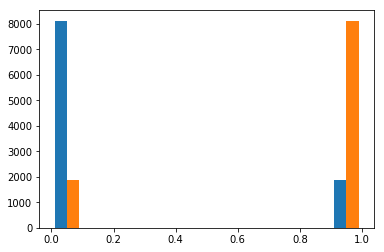

In [49]:
plt.hist(y_test_eo)

### 來開始寫Functional API
首先先放進一些需要的東西

In [60]:
from keras.models import Model
from keras.models import Input
from keras.layers import concatenate, add

### 架構是這樣子的 輸出其實只有兩維(是5的倍數的機率)

<img src="branch-and-merge.png" alt="drawing" style="width: 400px;"/>

### 定義函數

In [56]:
x = Input(shape=[784,])
f_1 = Dense(500,activation='sigmoid')
f_2 = Dense(500,activation='sigmoid')
f_3 = Dense(2,activation='softmax')
f_4 = Dense(500,activation='relu')
h_1 = f_1(x)
h_2 = f_2(h_1)
z = f_4(h_1)


In [58]:
print(h_1)
print(h_2)
print(x)

Tensor("dense_5/Sigmoid:0", shape=(?, 500), dtype=float32)
Tensor("dense_6/Sigmoid:0", shape=(?, 500), dtype=float32)
Tensor("input_2:0", shape=(?, 784), dtype=float32)


In [61]:
u = concatenate([h_2, z])
y = f_3(u)

In [62]:
print(u)
print(y)

Tensor("concatenate_1/concat:0", shape=(?, 1000), dtype=float32)
Tensor("dense_7/Softmax:0", shape=(?, 2), dtype=float32)


In [63]:
model = Model(x, y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 500)          392500      input_2[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 500)          250500      dense_5[0][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 500)          250500      dense_5[0][0]                    
__________________________________________________________________________________________________
concatenat

In [64]:
model.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])

In [65]:
model.fit(x_train, y_train_eo, batch_size=100, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 14s 235us/step - loss: 0.1844 - acc: 0.8108
Epoch 2/5
60000/60000 [==============================] - 12s 193us/step - loss: 0.1538 - acc: 0.8360
Epoch 3/5
60000/60000 [==============================] - 12s 208us/step - loss: 0.0501 - acc: 0.9343
Epoch 4/5
60000/60000 [==============================] - 13s 214us/step - loss: 0.0401 - acc: 0.9475
Epoch 5/5
60000/60000 [==============================] - 13s 216us/step - loss: 0.0376 - acc: 0.9512


In [70]:
predict = model.predict(x_test)
predict = np.argmax(predict,axis=1)

In [80]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28),cmap='Greys')
    if predict[測試編號] == 1 :
        print('神經網路判斷為:','是')
    else :
        print('神經網路判斷為:','不是')
        
        

SyntaxError: invalid syntax (<ipython-input-80-0cb9ce0ab114>, line 3)

array([2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=uint8)